# **BUSINESS OVERVIEW**
---
# **PROBLEM STATEMENT**
---
Customer churn is a major issue for telecommunications companies. Losing customers means a decline in revenue, increased marketing costs to acquire new customers, and reduced market share. By predicting which customers are likely to "soon" stop using the service, the company can take proactive measures to retain them.

---
# **Business Impact**
---
1. Reduce churn rate: By identifying at-risk customers early, the company can offer discounts, personalized plans, or better customer support.

2. Increase customer retention: Implementing targeted interventions can improve customer loyalty.

3. Optimize marketing efforts: Instead of mass promotions, the company can focus on high-risk customers, reducing costs.

4. Improve customer experience: Addressing dissatisfaction before a customer leaves can lead to higher satisfaction.
---
# PROPOSED SOLUTION
Build a machine learning classifier to predict whether a customer will soon stop using the service based on usage patterns, customer service interactions, and plan details.




# **EXPLORATORY DATA ANALYSIS**

In [25]:
# IMPORT ALL NECESSARY LIBRARIES.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
churn_df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [27]:
print(churn_df.head())

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [28]:
print(churn_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [29]:
# Check the summary statistics
print(churn_df.describe())

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [30]:
# Check for missing values
print(churn_df.isnull().sum())


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


# DATA VISUALIZATION.

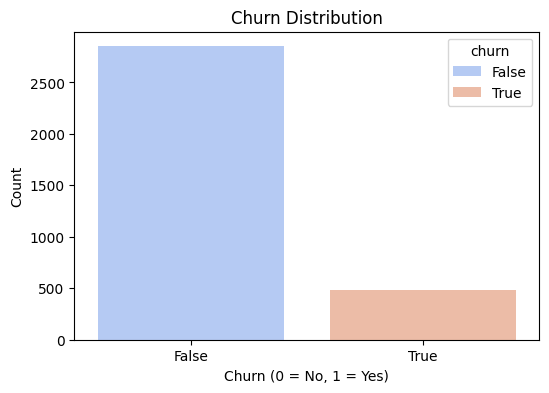

In [31]:
# Churn distribution
plt.figure(figsize=(6, 4))
#sns.countplot(x="churn", data=churn_df, palette="coolwarm")

sns.countplot(x="churn", data=churn_df, palette="coolwarm",hue = "churn")
#
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


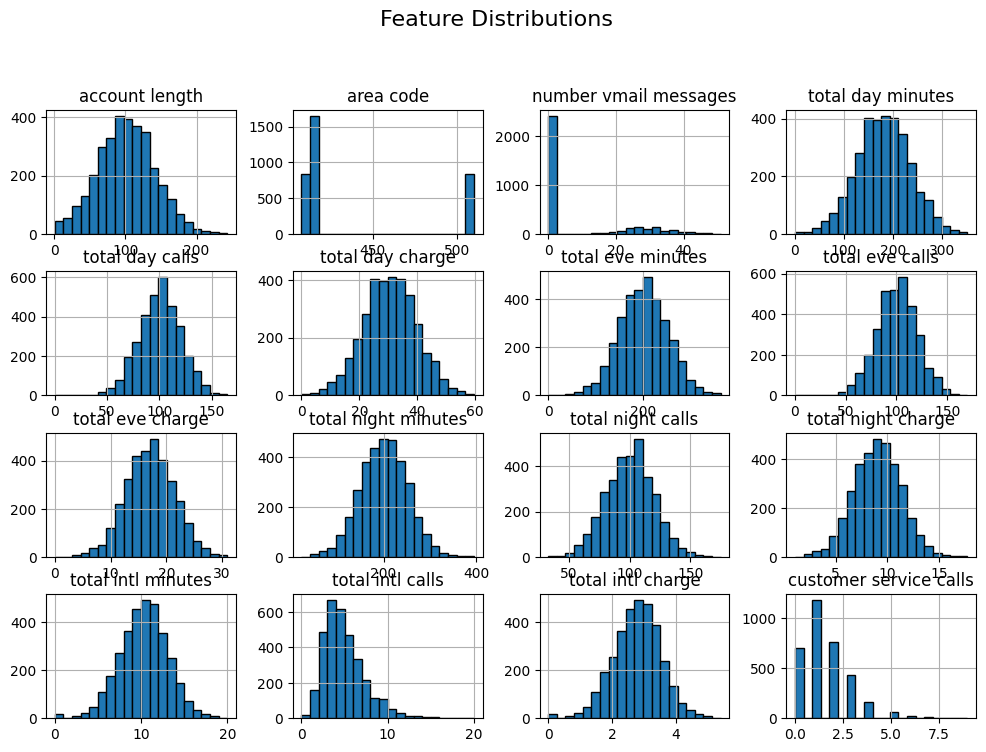

In [32]:
# Feature distributions
churn_df.hist(figsize=(12, 10), bins=20, edgecolor='black', layout=(5, 4))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


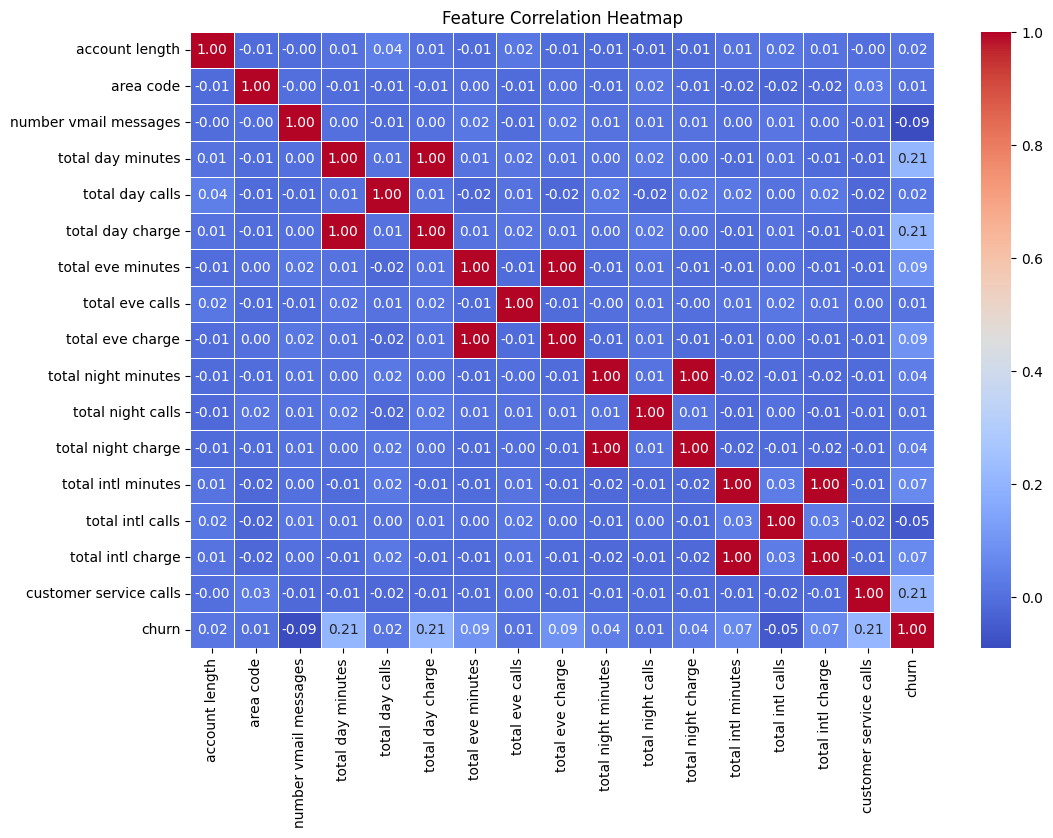

In [33]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(churn_df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


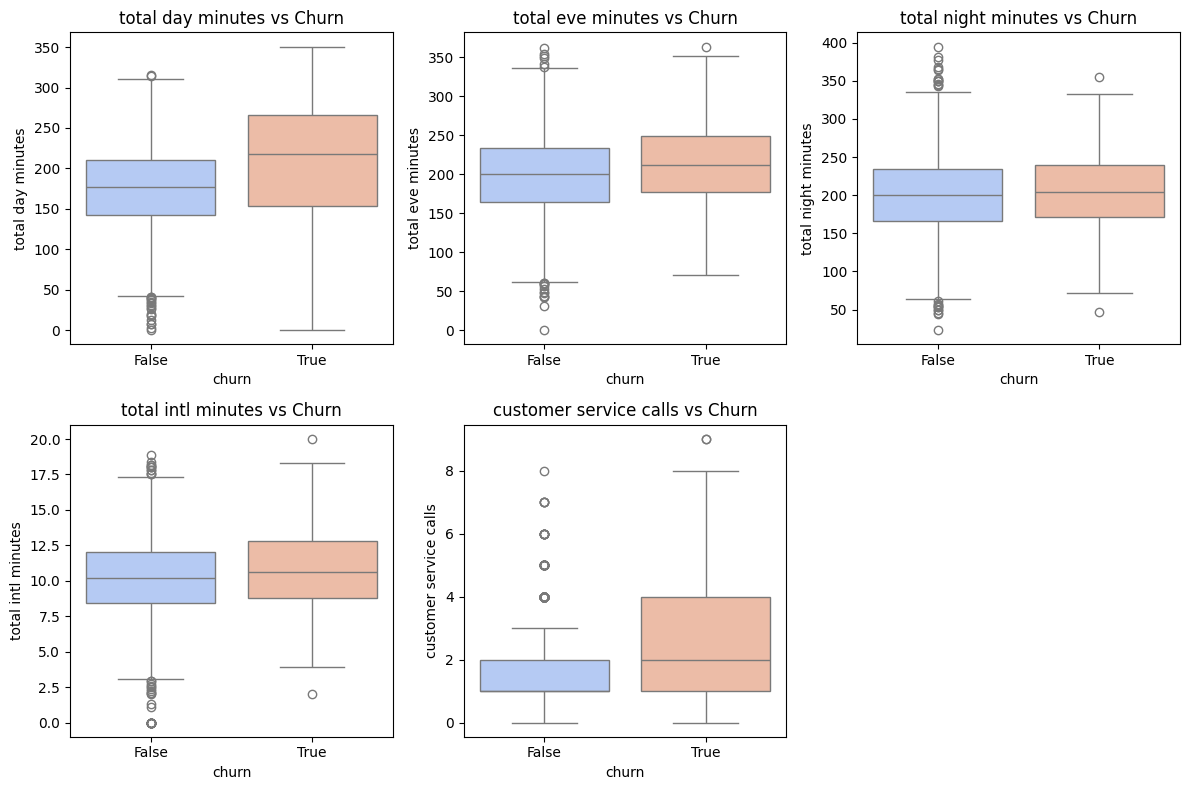

In [34]:
import warnings
warnings.filterwarnings('ignore')

# Boxplots for key features vs. churn
num_features = ["total day minutes", "total eve minutes", "total night minutes", "total intl minutes", "customer service calls"]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x="churn", y=feature, data=churn_df, palette="coolwarm")
    plt.title(f"{feature} vs Churn")

plt.tight_layout()
plt.show()



# **STATISTICAL ANALYSIS**

In [35]:
desc_stats = churn_df.describe().T
desc_stats["skewness"] = churn_df.skew(numeric_only=True)
desc_stats["kurtosis"] = churn_df.kurtosis(numeric_only=True)
print(desc_stats)
"""area code ,number vmail messages ,total intl calls,customer service calls are highly skewed. This indicates potetial outliers.
"""

                         count        mean        std     min     25%     50%  \
account length          3333.0  101.064806  39.822106    1.00   74.00  101.00   
area code               3333.0  437.182418  42.371290  408.00  408.00  415.00   
number vmail messages   3333.0    8.099010  13.688365    0.00    0.00    0.00   
total day minutes       3333.0  179.775098  54.467389    0.00  143.70  179.40   
total day calls         3333.0  100.435644  20.069084    0.00   87.00  101.00   
total day charge        3333.0   30.562307   9.259435    0.00   24.43   30.50   
total eve minutes       3333.0  200.980348  50.713844    0.00  166.60  201.40   
total eve calls         3333.0  100.114311  19.922625    0.00   87.00  100.00   
total eve charge        3333.0   17.083540   4.310668    0.00   14.16   17.12   
total night minutes     3333.0  200.872037  50.573847   23.20  167.00  201.20   
total night calls       3333.0  100.107711  19.568609   33.00   87.00  100.00   
total night charge      3333

'area code ,number vmail messages ,total intl calls,customer service calls are highly skewed. This indicates potetial outliers.\n'

In [36]:
# hypothesis testing
# 1.T-test
from scipy.stats import ttest_ind

# Splitting data into churned and non-churned groups
churned = churn_df[churn_df["churn"] == 1]["total day minutes"]
not_churned = churn_df[churn_df["churn"] == 0]["total day minutes"]

# independent t-test
t_stat, p_value = ttest_ind(churned, not_churned, equal_var=False)
print(f"T-test Statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-test Statistic: 9.6846, P-value: 0.0000


In [37]:
# 2. Chi-square test.
from scipy.stats import chi2_contingency

# CONTIGENCY TABLE.
contingency_table = pd.crosstab(churn_df["international plan"], churn_df["churn"])

#chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-value: {p_value:.4f}")

Chi-Square Statistic: 222.5658, P-value: 0.0000


In [38]:
# 3. Correlation analysis.
correlations = churn_df.corr(numeric_only=True)["churn"].sort_values(ascending=False)
print(correlations)

churn                     1.000000
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
total intl calls         -0.052844
number vmail messages    -0.089728
Name: churn, dtype: float64


In [39]:
# 4. ANOVA F-TEST(Feature importance analysis)
from sklearn.feature_selection import f_classif

# Defining features and the target variable.
X = churn_df.drop("churn", axis=1)  # Features
y = churn_df["churn"]  # Target variable

# Defining features as only numerical columns.
X_numerical = X.select_dtypes(include=np.number)

#  ANOVA F-values
f_values, p_values = f_classif(X_numerical, y)

feature_importance = pd.DataFrame({"Feature": X_numerical.columns, "F-Value": f_values, "P-Value": p_values})
feature_importance = feature_importance.sort_values(by="F-Value", ascending=False)

print(feature_importance.head(10))

                   Feature     F-Value       P-Value
15  customer service calls  151.767013  3.900360e-34
3        total day minutes  146.350785  5.300278e-33
5         total day charge  146.350657  5.300606e-33
6        total eve minutes   28.932577  8.011339e-08
8         total eve charge   28.926444  8.036524e-08
2    number vmail messages   27.035912  2.117522e-07
14       total intl charge   15.592581  8.018754e-05
12      total intl minutes   15.583468  8.057311e-05
13        total intl calls    9.327945  2.274701e-03
11      total night charge    4.202136  4.045122e-02


**SUMMARY OF STATISTICAL FINDINGS**

---


1. Churned customers have significantly different call durations.
2. Customer service calls strongly impact churn.
3. Having an international plan is correlated to higher churn.


# **PRE-PROCESSING AND FEATURE ENGINEERING.**

In [40]:

churn_df["soon_churn"] = ((churn_df["customer service calls"] > 3) | (churn_df["churn"] == 1)).astype(int)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# CREATING A NEW COLUMN 'soon_churn' to be our target variable.
churn_df["soon_churn"] = ((churn_df["customer service calls"] > 3) | (churn_df["churn"] == 1)).astype(int)
# Droping phone number column (not useful/feature)
df = churn_df.drop(columns=["phone number"])

# Encode categorical variables
df["international plan"] = df["international plan"].map({"no": 0, "yes": 1})
df["voice mail plan"] = df["voice mail plan"].map({"no": 0, "yes": 1})

# Dropping original churn column since we have new column 'suun_churn'.
df = df.drop(columns=["churn"])

# One-hot encoding for "state"
df = pd.get_dummies(df, columns=["state"], drop_first=True)

# Split data
X = df.drop(columns=["soon_churn"])
y = df["soon_churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization of numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


print(X_train.shape, X_test.shape)



(2666, 68) (667, 68)


# **MODELING AND EVALUATION**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [43]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(kernel="rbf", random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

# Print results
for model, metrics in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("Classification Report:")
    print(pd.DataFrame(metrics["Classification Report"]).T)
    print("\n" + "="*50 + "\n")


Model: Logistic Regression
Accuracy: 0.8846
Confusion Matrix:
[[524  21]
 [ 56  66]]
Classification Report:
              precision    recall  f1-score     support
0              0.903448  0.961468  0.931556  545.000000
1              0.758621  0.540984  0.631579  122.000000
accuracy       0.884558  0.884558  0.884558    0.884558
macro avg      0.831034  0.751226  0.781567  667.000000
weighted avg   0.876958  0.884558  0.876687  667.000000


Model: Random Forest
Accuracy: 0.9595
Confusion Matrix:
[[541   4]
 [ 23  99]]
Classification Report:
              precision    recall  f1-score    support
0              0.959220  0.992661  0.975654  545.00000
1              0.961165  0.811475  0.880000  122.00000
accuracy       0.959520  0.959520  0.959520    0.95952
macro avg      0.960192  0.902068  0.927827  667.00000
weighted avg   0.959576  0.959520  0.958158  667.00000


Model: SVM
Accuracy: 0.8771
Confusion Matrix:
[[534  11]
 [ 71  51]]
Classification Report:
              precision    r

**Random forest classifier is the best model with an accuracy score of 95.95%**

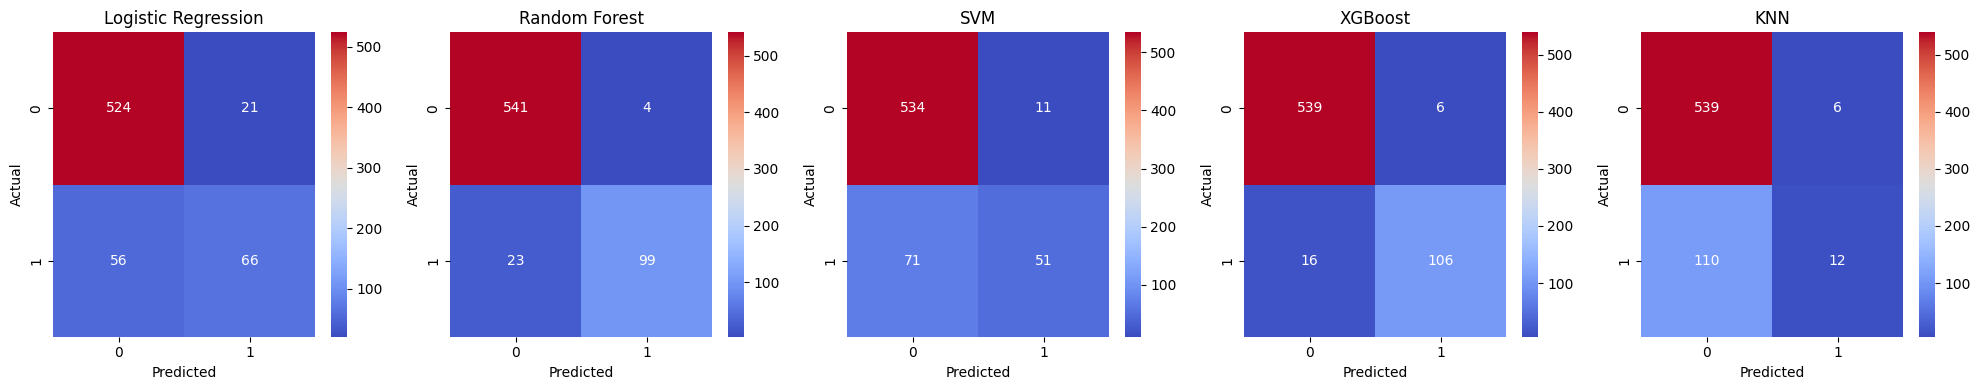

In [44]:
# Visualizing confusion matrices
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# **Business Solutions & Recommendations**
---
# Actionable Strategies Based on Model Predictions
----
1. Customer Retention Offers

Provide special discounts to at-risk customers.

Offer better mobile/internet plans based on their usage.

Provide free months of service to retain high-value customers.



2. Proactive Customer Support

Assign customer success managers to high-risk customers.

Reach out before they call support multiple times.

Offer personalized solutions based on their complaints.



3. Usage-Based Rewards & Incentives

Offer loyalty points for continued service.

Provide free upgrades for long-term customers.
